# Homework 2 - K. V. V. Krishna Teja

### Global Declaration

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
print("TensorFlow version: " + tf.__version__)

TensorFlow version: 2.1.0


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras import regularizers
from tensorflow.keras import initializers
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

### Import dataset
The data from Image_Segmentation.csv is imported and sorted out

In [3]:
print('Loading data...')
DataFrame = pd.read_csv("Image_Segmentation.csv")
# y = target values, last column of the data frame
y= DataFrame.iloc[:, -1]
# X = feature values, all the columns except the last column
x= DataFrame[['A1', 'A2','A3','A4', 'A5', 'A6','A7', 'A8','A9','A10','A11','A12', 'A13', 'A14','A15', 'A16', 'A17','A18', 'A19' ]]

Loading data...


### Splitting dataset

We now scale the dataframe using the MinMaxScaler from sklearn.preprocessing and add bias to this normalized dataframe

In [4]:
print('Normalising...')
minmax_scaler = MinMaxScaler()
x_norm = minmax_scaler.fit_transform(x)
x_norm = pd.DataFrame(x_norm, columns=['A1', 'A2','A3','A4', 'A5', 'A6','A7', 'A8','A9','A10','A11','A12', 'A13', 'A14','A15', 'A16', 'A17','A18', 'A19' ])
x_norm.insert(0,'A0',1)
x_norm.head()

Normalising...


,A0,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,A17,A18,A19
0,1,0.857708,0.695833,0.0,0.333333,0.0,0.028517,0.000552,0.024845,0.000393,0.415698,0.382496,0.498527,0.359314,0.472015,0.627059,0.148008,0.498527,0.318996,0.168487
1,1,0.442688,0.495833,0.0,0.000000,0.0,0.009506,0.000253,0.007453,0.000263,0.006197,0.000000,0.016937,0.000779,0.789179,0.184706,0.538899,0.016937,1.000000,0.154604
2,1,0.794466,0.125000,0.0,0.000000,0.0,0.032320,0.000779,0.024845,0.000740,0.857733,0.816045,0.926362,0.823850,0.272388,0.663529,0.292220,0.926362,0.199347,0.124946
3,1,0.122530,0.675000,0.0,0.000000,0.0,0.058935,0.001796,0.201242,0.004869,0.303899,0.288493,0.350515,0.268901,0.630597,0.427059,0.309298,0.350515,0.266914,0.175487
4,1,0.237154,0.775000,0.0,0.000000,0.0,0.049430,0.001528,0.058385,0.001389,0.345727,0.322528,0.407953,0.301637,0.563433,0.511765,0.240987,0.407953,0.302925,0.171556


In [5]:
# For comparison, here's the original set
x.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,A17,A18,A19
0,218,178,9,0.111111,0.0,0.833333,0.547722,1.111109,0.544331,59.629630,52.444443,75.222220,51.222220,-21.555555,46.77778,-25.222221,75.222220,0.318996,-2.040554
1,113,130,9,0.000000,0.0,0.277778,0.250924,0.333333,0.365148,0.888889,0.000000,2.555556,0.111111,-2.666667,5.00000,-2.333333,2.555556,1.000000,-2.123254
2,202,41,9,0.000000,0.0,0.944448,0.772202,1.111112,1.025597,123.037040,111.888885,139.777790,117.444440,-33.444443,50.22222,-16.777779,139.777790,0.199347,-2.299918
3,32,173,9,0.000000,0.0,1.722222,1.781593,9.000000,6.749488,43.592594,39.555557,52.888890,38.333336,-12.111111,27.88889,-15.777778,52.888890,0.266914,-1.998858
4,61,197,9,0.000000,0.0,1.444444,1.515353,2.611111,1.925463,49.592594,44.222220,61.555557,43.000000,-16.111110,35.88889,-19.777779,61.555557,0.302925,-2.022274


In [6]:
print('One-hot encoding...')
from numpy import array
from numpy import argmax
from tensorflow.keras.utils import to_categorical
# define example
data = array(y)
#print(data)
# one hot encode
encoded = to_categorical(data)
print(encoded)
# invert encoding (change value of encode[] to see inveterd output)
inverted = argmax(encoded[0])
print('class: ', inverted)

One-hot encoding...
[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
class:  6


## Splitting

In [7]:
print('Splitting into train and test sets...')
trainx = np.matrix(x_norm.iloc[0:2000])
trainy = np.matrix(y.iloc[0:2000]).transpose()
testx = np.matrix(x_norm.iloc[2000:2301])
testy = np.matrix(y.iloc[2000:2301]).transpose()

Splitting into train and test sets...


## Models

Experiment 1 with 1 hidden layer of 5 neurons

In [8]:
print('Experiment 1: ...')
i = 10
mdl1 = []
while i>0:
    input_size = 20
    output_size = 8
    hidden_layer_size = 5
# Visit https://keras.io/initializers/#initializer for more options on initializers
    model = Sequential()
    model.add(Dense(hidden_layer_size, activation = 'sigmoid',
                    input_shape=(20,),
                    kernel_initializer=initializers.lecun_normal(seed=None)))
    model.add(Dense(output_size, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy',
              optimizer='nadam',
              metrics=['accuracy'])
    model.fit(trainx, trainy, epochs=100, batch_size=100, verbose=0 )
    mdl1_loss, mdl1_accuracy = model.evaluate(testx,testy, batch_size=None)
    mdl1.append(mdl1_accuracy)
    i=i-1
print(list(np.around(mdl1,2)))
print('Avg Accuracy: ', np.mean(mdl1)*100)

Experiment 1: ...
300/300 [==============================] - 0s 200us/sample - loss: 1.0227 - accuracy: 0.7033
[0.78, 0.64, 0.67, 0.72, 0.65, 0.73, 0.72, 0.7, 0.6, 0.7]
Avg Accuracy:  69.10000443458557


Note:
Accuracy is not very high; shall now adjust for learning rate with the chosen optimizer instead od default values.

optimizer='adam' --> custom_optimizer = tf.keras.optimizers.(Adam/Nadam/Adamax)(learning_rate=0.1)
For this dataset, 'Adadelta' is not very accurate... keep in mind

Visit: https://keras.io/optimizers/ for more options on optimizers such as Adam, Adagrad, Adadelta, RMSprop

In [9]:
print('Experiment 1 (adjusted): ...')
i = 10
mdl1 = []
while i>0:
    input_size = 20
    output_size = 8
    hidden_layer_size = 5
# Visit https://keras.io/initializers/#initializer for more options on initializers    
    model = Sequential()
    model.add(Dense(hidden_layer_size, activation = 'sigmoid',
                    input_shape=(20,),
                    kernel_initializer=initializers.lecun_normal(seed=None)))
    model.add(Dense(output_size, activation='softmax'))
    custom_optimizer = tf.keras.optimizers.Nadam(learning_rate=0.1) #learning rate hyper-parameter fixed at 0.1
    model.compile(loss='sparse_categorical_crossentropy',
              optimizer=custom_optimizer,
              metrics=['accuracy'])
    model.fit(trainx, trainy, epochs=100, batch_size=100, verbose=0 )
    mdl1_loss, mdl1_accuracy = model.evaluate(testx,testy, batch_size=None)
    mdl1.append(mdl1_accuracy)
    i=i-1
print(list(np.around(mdl1,2))) #Rounding to nearest 10^-2 decimal
print('Avg Accuracy: ', np.mean(mdl1)*100) #Calculating mean for appended list

Experiment 1 (adjusted): ...
300/300 [==============================] - 0s 217us/sample - loss: 0.1599 - accuracy: 0.9567
[0.95, 0.94, 0.93, 0.93, 0.93, 0.94, 0.94, 0.93, 0.92, 0.96]
Avg Accuracy:  93.66666674613953


Our accuracy has now been boosted to 93.47% as compared to the previous 68.77%.

Using this format for the remaining models should work...

Experiment 2 with 1 hidden layer of 25 neurons

In [10]:
print('Experiment 2: ...')
i = 10
mdl2 = []
while i>0:
    input_size = 20
    output_size = 8
    hidden_layer_size = 25
# Visit https://keras.io/initializers/#initializer for more options on initializers    
    model = Sequential()
    model.add(Dense(hidden_layer_size, activation = 'sigmoid',
                    input_shape=(20,),
                    kernel_initializer=initializers.lecun_normal(seed=None)))
    model.add(Dense(output_size, activation='softmax'))
    custom_optimizer = tf.keras.optimizers.Nadam(learning_rate=0.1)
    model.compile(loss='sparse_categorical_crossentropy',
              optimizer=custom_optimizer,
              metrics=['accuracy'])
    model.fit(trainx, trainy, epochs=100, batch_size=100, verbose=0 )
    mdl2_loss, mdl2_accuracy = model.evaluate(testx,testy, batch_size=None)
    mdl2.append(mdl2_accuracy)
    i=i-1
print(list(np.around(mdl2,2)))
print('Avg Accuracy: ', np.mean(mdl2)*100) #Calculating mean for appended list

Experiment 2: ...
300/300 [==============================] - 0s 223us/sample - loss: 0.1413 - accuracy: 0.9567
[0.97, 0.95, 0.96, 0.95, 0.97, 0.95, 0.96, 0.95, 0.96, 0.96]
Avg Accuracy:  95.6666648387909


Experiment 3 with 2 hidden layers and 5 neurons each

In [11]:
print('Experiment 3: ...')
i = 10
mdl3 = []
while i>0:
    input_size = 20
    output_size = 8
    hidden_layer_size = 5
# Visit https://keras.io/initializers/#initializer for more options on initializers    
    model = Sequential()
    model.add(Dense(hidden_layer_size, activation = 'sigmoid',
                    input_shape=(20,),
                    kernel_initializer=initializers.lecun_normal(seed=None)))
    model.add(Dense(hidden_layer_size, activation='sigmoid'))
    model.add(Dense(output_size, activation='softmax'))
    custom_optimizer = tf.keras.optimizers.Nadam(learning_rate=0.1)
    model.compile(loss='sparse_categorical_crossentropy',
              optimizer=custom_optimizer,
              metrics=['accuracy'])
    model.fit(trainx, trainy, epochs=100, batch_size=100, verbose=0 )
    mdl3_loss, mdl3_accuracy = model.evaluate(testx,testy, batch_size=None)
    mdl3.append(mdl3_accuracy)
    i=i-1
print(list(np.around(mdl3,2)))
print('Avg Accuracy: ', np.mean(mdl3)*100) #Calculating mean for appended list

Experiment 3: ...
300/300 [==============================] - 0s 230us/sample - loss: 0.4123 - accuracy: 0.8600
[0.94, 0.87, 0.94, 0.95, 0.94, 0.93, 0.95, 0.93, 0.95, 0.86]
Avg Accuracy:  92.5333321094513


Experiment 4 with 2 hidden layers and 25 neurons each

In [15]:
print('Experiment 4: ...')
i = 10
mdl4 = []
while i>0:
    input_size = 20
    output_size = 8
    hidden_layer_size = 25
# Visit https://keras.io/initializers/#initializer for more options on initializers    
    model = Sequential()
    model.add(Dense(hidden_layer_size, activation = 'sigmoid',
                    input_shape=(20,),
                    kernel_initializer=initializers.lecun_normal(seed=None)))
    model.add(Dense(hidden_layer_size, activation='sigmoid'))
    model.add(Dense(output_size, activation='softmax'))
    custom_optimizer = tf.keras.optimizers.Nadam(learning_rate=0.1)
    model.compile(loss='sparse_categorical_crossentropy',
              optimizer=custom_optimizer,
              metrics=['accuracy'])
    model.fit(trainx, trainy, epochs=100, batch_size=100, verbose=0 )
    mdl4_loss, mdl4_accuracy = model.evaluate(testx,testy, batch_size=None)
    mdl4.append(mdl4_accuracy)
    i=i-1
print(list(np.around(mdl4,2)))
print('Avg Accuracy: ', np.mean(mdl4)*100) #Calculating mean for appended list

Experiment 4: ...
300/300 [==============================] - 0s 263us/sample - loss: 0.0845 - accuracy: 0.9667
[0.92, 0.97, 0.91, 0.98, 0.98, 0.97, 0.94, 0.97, 0.97, 0.97]
Avg Accuracy:  95.73332667350769


## Plots

Options:  ['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


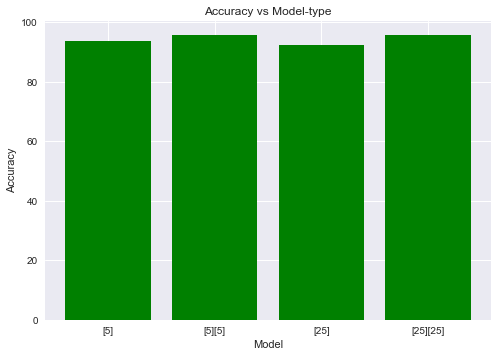

In [16]:
# Choose plot style from below selection and use it
print('Options: ', plt.style.available)
plt.style.use('seaborn')

hdn_lyrs = ['[5]', '[5][5]', '[25]', '[25][25]' ]
accuracy = [np.mean(mdl1)*100, np.mean(mdl2)*100, np.mean(mdl3)*100, np.mean(mdl4)*100]

pos = [i for i, _ in enumerate(hdn_lyrs)]

plt.bar(pos, accuracy, color='g')
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Model-type")

# pyplot.xticks sets the current tick locations and labels of the x-axis
plt.xticks(pos, hdn_lyrs)
plt.show()